                                            Publisher

                       Project 2 - Amanda Arce & Tresanne Bonnick

Let's import the relevant modules first !

In [1]:
# imports
import pandas as pd
import numpy as np

Also, let's import matplotlib for plotting graphs

`%matplotlib inline` is used for inline plotting of graphs within the notebook

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
publisher=pd.read_csv('https://raw.githubusercontent.com/mandiemannz/personalincome1/master/publisher1.csv')
publisher.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,PMC3378987\n,Elsevier,Academy of Nutrition and Dietetics,Parent support and parent mediated behaviours ...,2531.0
1,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,2949.0
2,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,1312.0
3,NaN,American Chemical Society,ACS Chemical Biology,Discovery of β2 Adrenergic Receptor Ligands Us...,2487.0
4,PMID: 24015914 PMC3833349,American Chemical Society,ACS Chemical Biology,Discovery of an allosteric inhibitor binding s...,1452.0


In [4]:
publisher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 5 columns):
PMID/PMCID                                             1928 non-null object
Publisher                                              2127 non-null object
Journal title                                          2126 non-null object
Article title                                          2127 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    2127 non-null float64
dtypes: float64(1), object(4)
memory usage: 83.2+ KB


In [5]:
#change column names
publisher_cols =['id', 'publisher','journal_title', 'article_title','Cost']
publisher.columns = publisher_cols

In [6]:
publisher.head()

,id,publisher,journal_title,article_title,Cost
0,PMC3378987\n,Elsevier,Academy of Nutrition and Dietetics,Parent support and parent mediated behaviours ...,2531.0
1,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,2949.0
2,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,1312.0
3,NaN,American Chemical Society,ACS Chemical Biology,Discovery of β2 Adrenergic Receptor Ligands Us...,2487.0
4,PMID: 24015914 PMC3833349,American Chemical Society,ACS Chemical Biology,Discovery of an allosteric inhibitor binding s...,1452.0


In [7]:
# Drop the columns {ID, Journal_title}
publisher.drop(['id','journal_title'],axis=1, inplace=True)
publisher.head()

,publisher,article_title,Cost
0,Elsevier,Parent support and parent mediated behaviours ...,2531.0
1,ACS (Amercian Chemical Society) Publications,A Novel Allosteric Inhibitor of the Uridine Di...,2949.0
2,ACS (Amercian Chemical Society) Publications,Chemical proteomic analysis reveals the drugab...,1312.0
3,American Chemical Society,Discovery of β2 Adrenergic Receptor Ligands Us...,2487.0
4,American Chemical Society,Discovery of an allosteric inhibitor binding s...,1452.0


#### Group by -> Name of publisher and first checking the statistical description of the dataframe

In [8]:
publisher.groupby('publisher').describe()

Cost
publisher                                                      
ACS                                          count     7.000000
                                             mean   2104.142857
                                             std     555.864321
                                             min    1099.000000
                                             25%    1949.000000
                                             50%    2149.000000
                                             75%    2372.500000
                                             max    2838.000000
ACS (Amercian Chemical Society) Publications count     5.000000
                                             mean   2365.200000
                                             std     664.531188
                                             min    1312.000000
                                             25%    2255.000000
                                             50%    2394.000000
                                             75%    2916.000000
                                             max    2949.000000
ACS Publications                             count     2.000000
                                             mean   1938.500000
                                             std     700.742820
                                             min    1443.000000
                                             25%    1690.750000
                                             50%    1938.500000
                                             75%    2186.250000
                                             max    2434.000000
AGA Institute                                count     1.000000
                                             mean   2622.000000
                                             std            NaN
                                             min    2622.000000
                                             25%    2622.000000
                                             50%    2622.000000
...                                                         ...
Wolters Kluwer Health                        std      67.882251
                                             min    1911.000000
                                             25%    1935.000000
                                             50%    1959.000000
                                             75%    1983.000000
                                             max    2007.000000
Wolters Kluwer N.V./Lippinott                count     1.000000
                                             mean   2378.000000
                                             std            NaN
                                             min    2378.000000
                                             25%    2378.000000
                                             50%    2378.000000
                                             75%    2378.000000
                                             max    2378.000000
Wolters Kluwers                              count     1.000000
                                             mean   1280.000000
                                             std            NaN
                                             min    1280.000000
                                             25%    1280.000000
                                             50%    1280.000000
                                             75%    1280.000000
                                             max    1280.000000
public.service.co.uk                         count     1.000000
                                             mean   1732.000000
                                             std            NaN
                                             min    1732.000000
                                             25%    1732.000000
                                             50%    1732.000000
                                             75%    1732.000000
                                             max    1732.000000

[2392 rows x 1 columns]

# Deriving Insights from the dataset:
### Now we see some statistics like 
- Total number of publishers
- Max price of books from a particular publisher
- Total number of books from a particular publisher
- Total cost of all articles for each publisher
- The publisher with the article having the maximum cost amongst all articles published

### 1. Total number of publishers

In [9]:
len(publisher.groupby('publisher'))

299

### => Total 299 publishers

## Let's find out, if we have null values in any row of the dataset

In [10]:
publisher.isnull()

,publisher,article_title,Cost
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [11]:
publisher.isnull().sum()

publisher        1
article_title    1
Cost             1
dtype: int64

### Seems like there is one row, let's find it out.

In [12]:
publisher[publisher.isnull().any(axis=1)]

,publisher,article_title,Cost
2127,NaN,NaN,NaN


### This means row number 2127 is the only row with null values. Let's get rid of it.

In [13]:
# remove the row with null value
publisher = publisher[:-1]

### 2. Max price of books from a particular publisher

In [14]:
publisher.groupby('publisher').max()

,article_title,Cost
publisher,,
ACS,Structural characterization of a Model Gram-ne...,2838.0
ACS (Amercian Chemical Society) Publications,Synthesis and evaluation of α-thymidine analog...,2949.0
ACS Publications,Synthesis and in vitro and in vivo characteriz...,2434.0
AGA Institute,Much of the genetic risk of colorectal cancer ...,2622.0
AMBSB,Annexin-1 interaction with FPR2/ALX,2734.0
AMERICAN CHEMICAL SOCIETY,HYDROXY-TERMINATED CONJUGATED POLYMER NANOPART...,2774.0
ASBMB,The T-cel receptor triggering apparatus is com...,2836.0
ASBMB Cadmus,Biochemical and immunological characterisation...,2077.0
ASBMB/Cadmus,Defining the requirements for collagenase clea...,2543.0


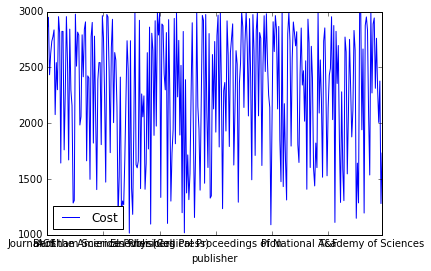

In [15]:
publisher.groupby('publisher').max().plot()

In [16]:
publisher.groupby('publisher').max().plot

### 3. Total number of books from a particular publisher

In [17]:
publisher['publisher'].value_counts(dropna=False)

Elsevier                                                   387
Public Library of Science                                  278
Wiley                                                      136
Springer                                                    81
Oxford University Press                                     77
OUP                                                         56
Wiley-Blackwell                                             56
ASBMB                                                       46
Nature Publishing Group                                     45
BioMed Central                                              40
BMC                                                         26
Nature                                                      24
BMJ                                                         23
Frontiers                                                   23
Royal Society                                               22
Cambridge University Press                             

### 4. Total cost of all articles for each publisher

In [18]:
publisher.groupby('publisher').sum()

,Cost
publisher,
ACS,14729.0
ACS (Amercian Chemical Society) Publications,11826.0
ACS Publications,3877.0
AGA Institute,2622.0
AMBSB,2734.0
AMERICAN CHEMICAL SOCIETY,2774.0
ASBMB,87985.0
ASBMB Cadmus,2077.0
ASBMB/Cadmus,2543.0


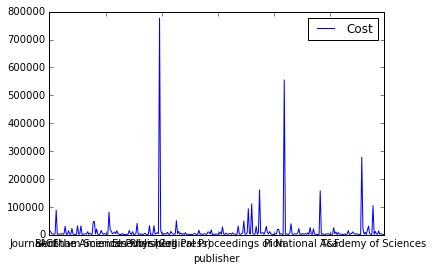

In [19]:
publisher.groupby('publisher').sum().plot()

### 5. The publisher with the article having the maximum cost amongst all articles published

In [23]:
# publisher.groupby('publisher').sum()
publisher.loc[publisher['Cost'].idxmax()]

publisher                                                 Elsevier
article_title    A novel assay of antimycobacterial activity an...
Cost                                                          2999
Name: 2105, dtype: object